# Audio enginering basics

## 1. Load Audio + Inspect Basics

In [1]:
from pydub import AudioSegment

In [2]:
audio = AudioSegment.from_file("song.mp3")

In [3]:
print("Duration (ms):", len(audio))
print("Channels:", audio.channels)
print("Frame Rate:", audio.frame_rate)
print("Sample Width (bytes):", audio.sample_width)
print("dBFS (average loudness):", audio.dBFS)

Duration (ms): 209185
Channels: 2
Frame Rate: 48000
Sample Width (bytes): 2
dBFS (average loudness): -16.28800608461156


## 2. Slicing Audio (Show Output Sizes)

In [4]:
first_5_sec = audio[:5000]
next_5_sec = audio[5000:10000]

print("First 5 sec duartion:", len(first_5_sec))
print("Next 5 sec duration:", len(next_5_sec))

First 5 sec duartion: 5000
Next 5 sec duration: 5000


## 3. Fade In/Fade Out Demo

In [5]:
fade_in_clip = audio[:5000].fade_in(3000)
fade_out_clip = audio[:5000].fade_out(3000)

print("Fade-in clip:", fade_in_clip)
print("Fade-out clip:", fade_out_clip)

Fade-in clip: <pydub.audio_segment.AudioSegment object at 0x000002985F1BA080>
Fade-out clip: <pydub.audio_segment.AudioSegment object at 0x000002985F1B9CF0>


## 4. Concatenation Demo

In [6]:
combined = first_5_sec + next_5_sec
print("Combined length:", len(combined))

Combined length: 10000


## 5. SIMPLE Waveform Plot Using Librosa + Matplotlib
Peaks = loud parts

Valleys = quiet parts

They visually understand fade, slicing, transitions

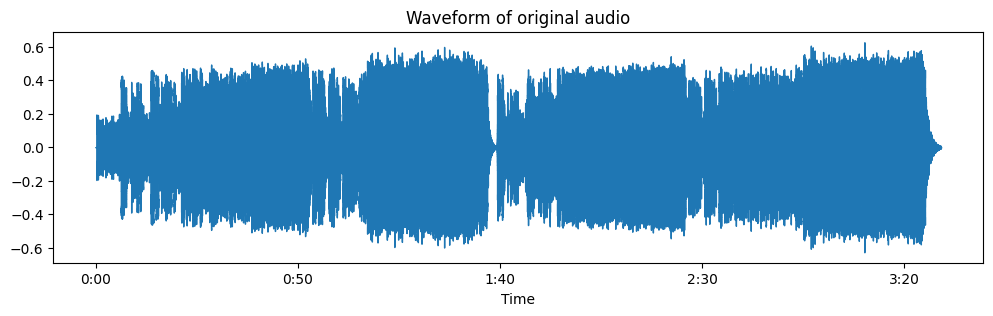

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("song.mp3", sr = None)

plt.figure(figsize=(12,3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of original audio")
plt.show()

## 6. Visualize Fade-In vs Fade-Out

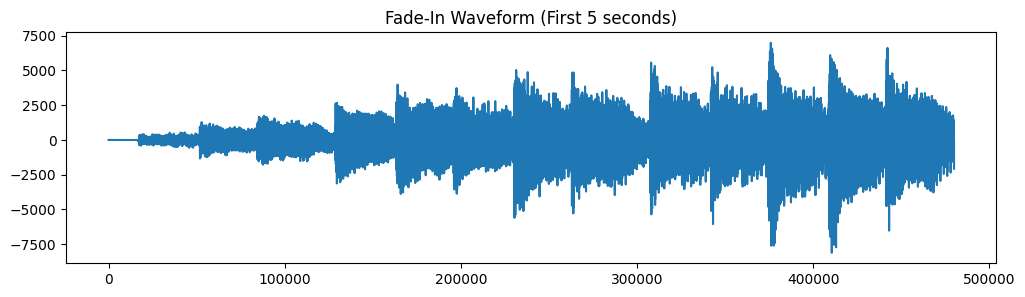

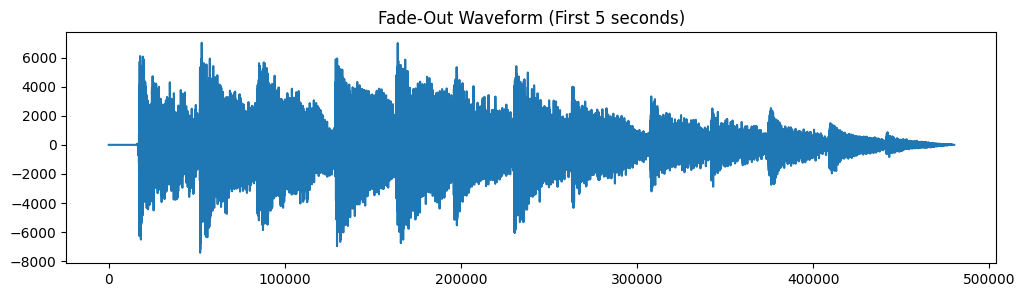

In [12]:
fade_in_audio = fade_in_clip.get_array_of_samples()
fade_out_audio = fade_out_clip.get_array_of_samples()


plt.figure(figsize=(12,3))
plt.plot(fade_in_audio)
plt.title("Fade-In Waveform (First 5 seconds)")
plt.show()


plt.figure(figsize=(12,3))
plt.plot(fade_out_audio)
plt.title("Fade-Out Waveform (First 5 seconds)")
plt.show()

# LOGIC

In [15]:
from pydub import AudioSegment
import os, random

In [17]:
os.listdir("mixtape")

['aaj-din-chadheya.mp3', 'dildara.mp3']

In [19]:
def smooth_fade_mixtape(folder, output = "output/mixtape.mp3", transition_ms = 10000):
    files = [f for f in os.listdir("mixtape") if f.endswith((".mp3",".wav"))]
    random.shuffle(files) #shuffle for variety

    mixtape = None

    for i, file in enumerate(files):
        song = AudioSegment.from_file(os.path.join(folder,file))
        song = song.set_channels(2).set_frame_rate(44100) # stereo

        if mixtape is None:
            mixtape = song

        else:
            # define overlap region
            overlap = min(transition_ms, len(song), len(mixtape))

            # outgoing: fade out + high-pass to remove bass
            outgoing = mixtape[-overlap:].fade_out(overlap).low_pass_filter(4000)

            # incoming: fade in + low-pass to smooth highs
            incoming = song[:overlap].fade_in(overlap).low_pass_filter(4000)

            # overlay transition
            transition = outgoing.overlay(incoming)

            mixtape = mixtape[:-overlap] + transition + song[overlap:]
    
    mixtape.export(output, format = "mp3")
    print(f"Smooth fade mixtape generated: {output}")

smooth_fade_mixtape("mixtape")



Smooth fade mixtape generated: output/mixtape.mp3


# DESCRIPTION GENERATOR

In [20]:
import os
from pydub import AudioSegment

def generate_youtube_description_with_timestamps(
    track_folder,
    mixtape_name="Bollywood Romantic Mashup",
    genre="Bollywood / Hindi Romantic",
    start_time_sec=0
):
    """
    Generates a YouTube description with tracklist, timestamps, and hashtags.
    Assumes audio files are in order of playback.
    """

    audio_extensions = (".mp3", ".wav", ".flac", ".aac", ".ogg", ".m4a")
    tracks = [f for f in os.listdir(track_folder) if f.lower().endswith(audio_extensions)]

    if not tracks:
        return "No audio tracks found in the folder!"

    tracks.sort()

    description = f"🎶 {mixtape_name} 🎶\n"
    description += f"Genre: {genre}\n\n"
    description += "✨ A soulful Bollywood mix featuring timeless romantic melodies.\n\n"
    description += "🎵 Tracklist:\n"

    current_time = start_time_sec

    for idx, track in enumerate(tracks, 1):
        track_path = os.path.join(track_folder, track)
        audio = AudioSegment.from_file(track_path)
        duration_sec = len(audio) // 1000

        minutes = current_time // 60
        seconds = current_time % 60
        timestamp = f"{minutes:02d}:{seconds:02d}"

        track_name = os.path.splitext(track)[0]
        description += f"{timestamp} - {track_name}\n"

        current_time += duration_sec

    description += "\n💖 Sit back, relax and enjoy these beautiful Hindi melodies.\n"
    description += "🎧 Like, Share & Subscribe for more Bollywood mixes!\n\n"

    hashtags = [
        "#BollywoodSongs",
        "#HindiSongs",
        "#RomanticSongs",
        "#Dildara",
        "#AajDinChadheya",
        "#BollywoodMashup",
        "#LoveSongs",
        "#HindiMusic",
        "#SoulfulSongs",
        "#IndianMusic"
    ]

    description += " ".join(hashtags)

    return description


In [21]:
# Example usage
track_folder = r"mixtape"

description_text = generate_youtube_description_with_timestamps(
    track_folder,
    mixtape_name="Dildara x Aaj Din Chadheya | Bollywood Romantic Mashup",
    genre="Bollywood Romantic / Hindi Love Songs"
)

print(description_text)

# Optional: save to file
with open("youtube_description.txt", "w", encoding="utf-8") as f:
    f.write(description_text)


🎶 Dildara x Aaj Din Chadheya | Bollywood Romantic Mashup 🎶
Genre: Bollywood Romantic / Hindi Love Songs

✨ A soulful Bollywood mix featuring timeless romantic melodies.

🎵 Tracklist:
00:00 - aaj-din-chadheya
05:09 - dildara

💖 Sit back, relax and enjoy these beautiful Hindi melodies.
🎧 Like, Share & Subscribe for more Bollywood mixes!

#BollywoodSongs #HindiSongs #RomanticSongs #Dildara #AajDinChadheya #BollywoodMashup #LoveSongs #HindiMusic #SoulfulSongs #IndianMusic


## VIDEO GENERATOR

#### The function takes an image and an audio file, resizes the image to a fixed video resolution, and saves it temporarily. It then builds an FFmpeg command that loops the image, combines it with the audio, and encodes the result using H.264 video and AAC audio. A very low FPS and the ultrafast preset are used to make rendering extremely fast, since the visual is static. FFmpeg creates an MP4 video that lasts exactly as long as the audio. After the video is generated, the temporary resized image is deleted.

In [22]:
import subprocess
import os
from PIL import Image

In [23]:
def make_video_from_audio_optimized(image_path, audio_path, output_path="output/mixtape_vid.mp4",
                                    video_resolution=(1280, 720), fps=1, preset="ultrafast"):
    
    
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")
    if not os.path.exists(audio_path):
        raise FileNotFoundError(f"Audio not found: {audio_path}")
    
    # Ensure output folder exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Resize image if necessary
    img_resized_path = "temp_resized_image.jpg"
    img = Image.open(image_path)
    img = img.resize(video_resolution)
    img.save(img_resized_path)
    
    # FFmpeg command
    cmd = [
        "ffmpeg",              # invoke FFmpeg program
        "-y",                  # overwrite output file without asking
        "-loop", "1",          # loop the input image (so it stays on screen)
        "-i", img_resized_path,  # input #1: the static image
        "-i", audio_path,        # input #2: the audio track (mp3/wav/etc.)
        "-c:v", "libx264",       # encode video using H.264 codec
        "-preset", preset,       # encoding speed/quality preset (e.g. 'fast', 'medium')
        "-tune", "stillimage",   # optimize encoding for a static image
        "-r", str(fps),          # set frames per second (low = smaller file)
        "-c:a", "aac",           # encode audio using AAC codec
        "-b:a", "192k",          # set audio bitrate to 192kbps
        "-shortest",             # stop encoding when the shortest input ends (audio ends)
        output_path              # output file path (e.g. .mp4)
    ]
    
    try:
        subprocess.run(cmd, check=True)
        print(f"✅ Video created: {output_path}")
    except subprocess.CalledProcessError as e:
        print("❌ FFmpeg failed! Error:", e)
    finally:
        # Clean up temporary resized image
        if os.path.exists(img_resized_path):
            os.remove(img_resized_path)
        

# Example usage
image_path = r"images/image.jpg"
audio_path = r"output/mixtape.mp3"
make_video_from_audio_optimized(image_path, audio_path)

✅ Video created: output/mixtape_vid.mp4
